## Stanford Parser

In [1]:
import nltk


#Look at the url, you can find a french parser !
!wget 'https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip'
!unzip stanford-parser-4.2.0.zip

nltk.download('punkt')

--2023-05-29 11:00:56--  https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-parser-4.2.0.zip [following]
--2023-05-29 11:00:56--  https://downloads.cs.stanford.edu/nlp/software/stanford-parser-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182285548 (174M) [application/zip]
Saving to: ‘stanford-parser-4.2.0.zip’

stanford-parser-4.2 100%[===================>] 173.84M  5.11MB/s    in 30s     

2023-05-29 11:01:27 (5.75 MB/s) - ‘stanford-parser-4.2.0.zip’ saved [182285548/182285548]

Archive:  stanford-parser-4.2.0.zip
   creat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from nltk.parse.stanford import StanfordParser
english_parser = StanfordParser('stanford-parser-full-2020-11-17/stanford-parser.jar', 'stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')

<ipython-input-2-3cbf060cde91>:2: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  english_parser = StanfordParser('stanford-parser-full-2020-11-17/stanford-parser.jar', 'stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')


In [3]:
text = "Bryan is in the kitchen."

In [4]:
parsing = english_parser.raw_parse(text)

In [5]:
for line in parsing:
    for element in line:
        print(element)

(S
  (NP (NNP Bryan))
  (VP (VBZ is) (PP (IN in) (NP (DT the) (NN kitchen))))
  (. .))


## Dependency parser

In [6]:
from nltk.parse.stanford import StanfordDependencyParser

In [7]:
dependency_parser = StanfordDependencyParser('stanford-parser-full-2020-11-17/stanford-parser.jar', 'stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')

result = dependency_parser.raw_parse('Bryan is in the kitchen')

<ipython-input-7-6fc7b295a93e>:1: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  dependency_parser = StanfordDependencyParser('stanford-parser-full-2020-11-17/stanford-parser.jar', 'stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')


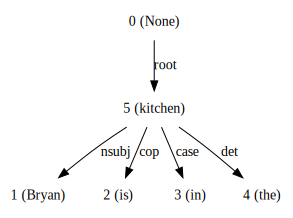

In [8]:
next(result)

## Chunking

In [9]:
from nltk.chunk.regexp import *
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
test_sent="Bryan is in the kitchen"

In [11]:
test_sent_pos=nltk.pos_tag(nltk.word_tokenize(test_sent))

In [12]:
#Finding Nound
rule= ChunkRule(r'(<NN>)', 'Chunk Tool')

In [13]:
parser= RegexpChunkParser([rule],chunk_label='CHUNK_RESULT')

In [14]:
print(parser.parse(test_sent_pos))

(S Bryan/NNP is/VBZ in/IN the/DT (CHUNK_RESULT kitchen/NN))


In [15]:
#Finding VBZ an NOUN
rule= ChunkRule(r'(<NN>|<VBZ>)', 'Chunk Tool')
parser= RegexpChunkParser([rule],chunk_label='CHUNK_RESULT')
print(parser.parse(test_sent_pos))

for e in parser.parse(test_sent_pos):
  print(e)

(S
  Bryan/NNP
  (CHUNK_RESULT is/VBZ)
  in/IN
  the/DT
  (CHUNK_RESULT kitchen/NN))
('Bryan', 'NNP')
(CHUNK_RESULT is/VBZ)
('in', 'IN')
('the', 'DT')
(CHUNK_RESULT kitchen/NN)
